# Mengatasi Missing Values

In [ ]:
# Contoh Data Cleaning dengan Python
import pandas as pd
import numpy as np
# Membuat dataframe contoh
data = {
'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', np.nan],
'Age': [25, 30, 35, 25, np.nan, 50],
'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}
df = pd.DataFrame(data)
# Menampilkan data awal
print("Data Awal:")
print(df)
# Menghapus duplikat
df = df.drop_duplicates()
# Menangani missing values dengan mengisi nilai median untuk kolom numerik
df['Age'] = df['Age'].fillna(df['Age'].median())
# Menghapus baris yang mengandung missing values di kolom 'Name'
df = df.dropna(subset=['Name'])
# Menampilkan data setelah cleaning
print("\nData Setelah Cleaning:")
df

Data Awal:
      Name   Age         City
0    Alice  25.0     New York
1      Bob  30.0  Los Angeles
2  Charlie  35.0      Chicago
3    Alice  25.0     New York
4      Eve   NaN        Miami
5      NaN  50.0  Los Angeles

Data Setelah Cleaning:


,Name,Age,City
0,Alice,25.0,New York
1,Bob,30.0,Los Angeles
2,Charlie,35.0,Chicago
4,Eve,32.5,Miami


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
print(df.isnull().sum())


Name    1
Age     1
City    0
dtype: int64


In [ ]:
# Mengisi Missing Values
df['Age'].fillna(df['Age'].mean())
# Mean
df['Age'].fillna(df['Age'].median(), inplace=True)
#Median
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
# Mode

<ipython-input-18-d5d88dc765a7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-18-d5d88dc765a7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Forward/Backward Fill
df['Age'].fillna(method='ffill', inplace=True)  # Forward fill
df['Age'].fillna(method='bfill', inplace=True)  # Backward fill

<ipython-input-19-00725efaf942>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-19-00725efaf942>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-19-00725efaf942>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplac

In [ ]:
df['Age'].fillna(method='bfill', inplace=True)  # Backward fill

<ipython-input-20-75152930b47e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(method='bfill', inplace=True)  # Backward fill
<ipython-input-20-75152930b47e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:
# Dropping Missing Values
df.dropna(subset=['Age'], inplace=True)

# Menghapus Duplikat

In [ ]:
# Identifikasi duplikat
print(df.duplicated().sum())
# Menghapus duplikat
df.drop_duplicates(inplace=True)

1


# Menangani Outliers

Outliers adalah data yang menyimpang secara signifikan dari sebagian besar data
dalam dataset. Mereka dapat berada jauh dari nilai rata-rata atau median dan mungkin
menunjukkan adanya variasi atau kesalahan dalam data. Outliers dapat disebabkan
oleh berbagai faktor, seperti kesalahan pengukuran, kesalahan pencatatan, atau
kejadian yang jarang terjadi tetapi sah. Mengapa Outliers Penting?
1. Pengaruh pada Statistik Deskriptif: Outliers dapat secara signifikan
mempengaruhi statistik seperti mean (rata-rata) dan standard deviation
(simpangan baku). Mereka dapat menyebabkan hasil statistik yang
menyesatkan.
2.   
Pengaruh pada Model Machine Learning: Dalam machine learning, outliers
dapat mempengaruhi kinerja model. Misalnya, model regresi linier dapat
condong atau menjadi tidak akurat jika terdapat outliers.

3. Indikasi Masalah atau Informasi Berharga: Outliers kadang-kadang dapat
menunjukkan kesalahan dalam data, tetapi mereka juga bisa memberikan
wawasan berharga tentang fenomena langka atau penting.

Penanganan Outliers

1.   Menghapus Outliers: Jika outliers disebabkan oleh kesalahan pengukuran atau
data yang tidak relevan, mereka dapat dihapus dari dataset.

2. Transformasi Data: Menggunakan teknik seperti log transformation untuk
mengurangi dampak outliers.

3.   Model yang Tahan Outliers: Menggunakan model machine learning yang lebih
tahan terhadap outliers, seperti tree-based methods.

In [ ]:
# Langkah 1: Membuat DataFrame
import pandas as pd
import numpy as np

data = {
'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', np.nan],
'Age': [25, 30, 35, 25, np.nan, 50],
'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}
df = pd.DataFrame(data)

# Langkah 2: Identifikasi Outliers
# Outliers dapat diidentifikasi menggunakan berbagai metode, salah satu yang umum adalah menggunakan Z-score atau IQR (Interquartile Range).
# Di sini, kita akan menggunakan IQR untuk mendeteksi outliers.
# Menghitung IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers:\n", outliers)

# Langkah 3: Menangani Outliers
# # Menghapus outliers
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Mengganti outliers dengan nilai median
median_age = df['Age'].median()
df['Age'] = np.where((df['Age'] < lower_bound) | (df['Age'] > upper_bound),
median_age, df['Age'])

# Mengisi missing values dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Name'].fillna('Unknown', inplace=True)

Outliers:
 Empty DataFrame
Columns: [Name, Age, City]
Index: []


<ipython-input-27-17b81f1b4d36>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-27-17b81f1b4d36>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# Mengubah Data Kategorikal ke Numerik

Mengubah data kategorikal ke numerik dalam analisis data dan pemodelan
machine learning sangat penting karena sebagian besar algoritma machine learning
membutuhkan input numerik untuk melakukan perhitungan. Ada beberapa alasan
utama mengapa transformasi ini diperlukan:

1.   Kompatibilitas dengan Algoritma: Banyak algoritma machine learning, seperti
regresi linier, regresi logistik, dan algoritma berbasis jarak seperti KNN, tidak
dapat beroperasi dengan data kategorikal. Mereka membutuhkan data
numerik untuk menghitung jarak, koefisien, dan parameter lainnya.

2. Kinerja  dan  Akurasi  Model:  Mengubah  data  kategorikal  menjadi  format
numerik memungkinkan model untuk lebih efektif mengenali pola dalam data.
Representasi numerik dapat membantu dalam memanfaatkan informasi yang
terkandung dalam variabel kategorikal, yang dapat meningkatkan kinerja dan
akurasi model.

3. Skalabilitas dan Efisiensi: Algoritma yang bekerja dengan data numerik sering
kali lebih efisien dan skalabel dibandingkan dengan yang harus bekerja dengan
data kategorikal. Data numerik memungkinkan operasi matematika dan
statistik yang lebih cepat dan lebih mudah diterapkan.

4. Persyaratan Prapemrosesan: Beberapa langkah prapemrosesan data, seperti
normalisasi atau standardisasi, memerlukan data dalam bentuk numerik. Ini
penting untuk memastikan bahwa semua fitur dalam dataset berada pada skala
yang sama, yang bisa mempengaruhi hasil dari algoritma ML.

In [ ]:
# Contoh: misalnya, kita memiliki dataset dengan kolom "City" yang berisi data kategorikal:
import pandas as pd
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami']}
df = pd.DataFrame(data)
# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['City'])
print(df_one_hot)

   City_Chicago  City_Los Angeles  City_Miami  City_New York
0         False             False       False           True
1         False              True       False          False
2          True             False       False          False
3         False             False       False           True
4         False             False        True          False


# Menangani Data Tidak Valid

Menangani data tidak valid adalah proses penting untuk memastikan integritas
dan kualitas dataset. Data tidak valid dapat mengganggu analisis dan menghasilkan
model yang tidak akurat. Berikut adalah langkah-langkah yang bisa diambil untuk
menangani data tidak valid:
Identifikasi Data Tidak Valid
1.   Pemeriksaan  Kesalahan:  Identifikasi  kesalahan  ketik  atau  entri  yang  tidak
sesuai format yang diharapkan.
2.   Pemeriksaan Batas Nilai: Pastikan nilai numerik berada dalam rentang yang
wajar.
3.   Pemeriksaan Konsistensi: Pastikan konsistensi antar kolom, misalnya tanggal
mulai tidak boleh setelah tanggal berakhir.
4.   Deteksi Anomali: Gunakan metode statistik atau algoritma untuk mendeteksi
anomali dalam data.

In [ ]:
# Penaganan Data Tidak Valid

import pandas as pd
import numpy as np

data = {
'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', np.nan],
'Age': [25, 30, 35, 25, np.nan, 50],
'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}
df = pd.DataFrame(data)

# Menghapus Data Tidak Valid: Jika jumlah data tidak valid kecil dan tidak signifikan, menghapusnya bisa menjadi solusi yang cepat dan mudah.
df = df.dropna(subset=['Age', 'Name']) # Menghapus baris dengan nilai 'Age' atau 'Name' yang tidak valid
# Mengganti dengan Nilai Lain:

# Mengisi dengan Rata-rata/Median: Mengisi nilai yang hilang atau tidak valid dengan rata-rata atau median.
df['Age'] = df['Age'].fillna(df['Age'].median())

# Mengisi dengan Nilai Default: Mengisi dengan nilai default yang logis atau sesuai konteks.
df['Name'] = df['Name'].fillna('Unknown')

# Pembersihan dengan Logika Bisnis: Menggunakan aturan bisnis untuk memperbaiki data. Misalnya, jika usia tidak masuk akal (misalnya lebih dari 120 tahun), maka ubah atau hapus.
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

In [ ]:
#  Contoh Menangani Data Tidak Valid

import pandas as pd
import numpy as np

data = {
'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', np.nan],
'Age': [25, 30, 35, 25, np.nan, 150],  # 150 dianggap sebagai nilai tidak valid
'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}
df = pd.DataFrame(data)

# Identifikasi nilai tidak valid
print("Data Awal:")
print(df)

# Mengubah nilai 'Age' yang tidak valid menjadi NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Mengisi nilai 'Age' yang hilang atau tidak valid dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Mengisi nilai 'Name' yang hilang dengan 'Unknown'
df['Name'] = df['Name'].fillna('Unknown')

print("\nData Setelah Menangani Nilai Tidak Valid:")
print(df)


Data Awal:
      Name    Age         City
0    Alice   25.0     New York
1      Bob   30.0  Los Angeles
2  Charlie   35.0      Chicago
3    Alice   25.0     New York
4      Eve    NaN        Miami
5      NaN  150.0  Los Angeles

Data Setelah Menangani Nilai Tidak Valid:
      Name    Age         City
0    Alice   25.0     New York
1      Bob   30.0  Los Angeles
2  Charlie   35.0      Chicago
3    Alice   25.0     New York
4      Eve   30.0        Miami
5  Unknown  150.0  Los Angeles


Dalam contoh ini, nilai usia yang tidak valid (150) diubah menjadi nilai median,
dan nama yang hilang diisi dengan 'Unknown'. Langkah-langkah ini membantu
memastikan bahwa data yang digunakan untuk analisis dan pemodelan lebih bersih
dan dapat diandalkan.

# Data Normalization

Data normalization adalah proses mengubah skala fitur dalam dataset sehingga
mereka berada dalam rentang yang sama atau memiliki distribusi yang serupa.
Normalisasi data penting untuk meningkatkan kinerja algoritma machine learning,
terutama yang sensitif terhadap skala data seperti k-NN, regresi linier, dan neural
networks. Mengapa Data Normalization Penting?

1. Konsistensi Skala: Algoritma berbasis jarak seperti k-NN dan K-Means clustering
sangat bergantung pada jarak antar titik data. Normalisasi memastikan bahwa
semua fitur berkontribusi secara proporsional terhadap jarak tersebut.

2.   Stabilitas Numerik: Model seperti regresi linier dan neural networks dapat
mengalami masalah stabilitas numerik jika fitur memiliki skala yang sangat
berbeda. Normalisasi membantu menghindari masalah ini dengan menjaga
nilai fitur dalam rentang yang seragam.
3. Kecepatan  Konvergensi:  Normalisasi  dapat  meningkatkan  kecepatan
konvergensi algoritma pembelajaran seperti gradient descent dengan
menghindari jalan yang curam di sepanjang satu dimensi dan datar di dimensi
lainnya.

Metode Normalisasi Data

1.   Min-Max  Scaling:  Mengubah  data  sehingga  berada  dalam  rentang  tertentu,
biasanya [0, 1].
2.   Z-Score Normalization (Standardization): Mengubah data sehingga memiliki rata-
rata 0 dan standar deviasi 1.

di mana µµ adalah rata-rata dan σσ adalah standar deviasi.

3.   Robust  Scaler:  Menggunakan  median  dan  IQR  (Interquartile  Range)  untuk
mengurangi pengaruh outliers.

In [ ]:
# Contoh Normalisasi dengan Python
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh dataset
data = {
'Age': [25, 30, 35, 40, 45],
'Salary': [50000, 60000, 70000, 80000, 90000]
}
df = pd.DataFrame(data)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df),
columns=df.columns)

# Z-Score Normalization
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df),
columns=df.columns)

print("Data Asli:")
print(df)


print("\nMin-Max Scaled Data:")
print(df_min_max_scaled)

print("\nStandardized Data:")
print(df_standard_scaled)

Data Asli:
   Age  Salary
0   25   50000
1   30   60000
2   35   70000
3   40   80000
4   45   90000

Min-Max Scaled Data:
    Age  Salary
0  0.00    0.00
1  0.25    0.25
2  0.50    0.50
3  0.75    0.75
4  1.00    1.00

Standardized Data:
        Age    Salary
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


Dalam contoh ini, kita melihat bagaimana fitur Age dan Salary diubah
menggunakan Min-Max Scaling dan Z-Score Normalization. Setelah normalisasi, data
berada dalam rentang yang lebih seragam, yang membantu meningkatkan kinerja
model machine learning.

# 5.3 Validasi Model

Validasi model adalah proses evaluasi model machine learning untuk memastikan
bahwa model tersebut bekerja dengan baik dan dapat diandalkan ketika diaplikasikan
pada data baru. Tujuan utama validasi model adalah untuk mengukur kinerja model,
mencegah overfitting, dan memastikan generalisasi model. Berikut adalah penjelasan
lebih lanjut tentang tujuan dan teknik validasi model. Tujuan Validasi Model:

1. Mengukur Kinerja Model: Validasi model membantu mengukur seberapa baik
model bekerja dalam hal akurasi, presisi, recall, F1-score, dan metrik lainnya.

2. Mencegah Overfitting: Overfitting terjadi ketika model terlalu menyesuaikan
diri dengan data pelatihan dan gagal menggeneralisasi pada data baru. Validasi
model membantu mengidentifikasi dan mengurangi overfitting.

3. Memastikan Generalisasi: Validasi memastikan bahwa model dapat bekerja
dengan baik pada data yang tidak terlihat sebelumnya, yang sangat penting
untuk aplikasi dunia nyata.

4. Pemilihan Model: Membantu dalam pemilihan model terbaik dari beberapa
model atau konfigurasi berdasarkan kinerja pada set validasi.

5. Hyperparameter Tuning: Membantu dalam menyetel hyperparameter model
untuk mendapatkan kinerja terbaik.

Teknik Validasi Model
1.   Holdout Validation: Dataset dibagi menjadi dua subset: satu untuk pelatihan
(training set) dan satu lagi untuk pengujian (test set). Contoh: 70% data untuk
pelatihan dan 30% data untuk pengujian. Kelemahan: Hasil bisa sangat
bergantung pada cara data dibagi.

2. K-Fold Cross-Validation: Dataset dibagi menjadi k subset (folds). Model dilatih
k kali, setiap kali menggunakan k-1 folds untuk pelatihan dan 1 fold untuk
pengujian. Contoh: 5-Fold Cross-Validation. Keuntungan: Lebih akurat dan
stabil karena menggunakan seluruh dataset untuk pelatihan dan pengujian.

3.  Stratified K-Fold Cross-Validation: Mirip dengan K-Fold, tetapi memastikan
bahwa setiap fold memiliki proporsi yang sama dari kelas target, menjaga
distribusi kelas yang konsisten di seluruh fold. Keuntungan: Berguna untuk
dataset yang tidak seimbang.

4. Leave-One-Out  Cross-Validation  (LOOCV):  Setiap  contoh  data  digunakan
sekali sebagai set pengujian sementara sisanya digunakan sebagai set pelatihan.
Keuntungan: Menggunakan semua data yang tersedia untuk pelatihan.
Kelemahan: Sangat memakan waktu dan komputasi untuk dataset besar.

5. Time  Series  Cross-Validation:  Digunakan  untuk  data  urutan  waktu.  Data
dibagi berdasarkan urutan waktu, memastikan bahwa model hanya dilatih
pada data dari masa lalu dan diuji pada data dari masa depan. Keuntungan:
Menghormati urutan temporal dan cocok untuk data deret waktu.

Contoh Implementasi K-Fold Cross-Validation di Python
Berikut   adalah   contoh   bagaimana   mengimplementasikan   K-Fold   Cross-
Validation menggunakan scikit-learn di Python:







In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
# Contoh dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([2, 3, 4, 5, 6])
# Model
model = LinearRegression()
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)

print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

K-Fold Cross-Validation Scores: [nan nan nan nan nan]
Mean Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

Outputnya adalah skor kinerja model untuk setiap fold dan rata-rata skornya,
yang memberikan gambaran umum tentang kinerja model Validasi model adalah
langkah kritis dalam machine learning yang membantu memastikan bahwa model
yang dikembangkan adalah akurat, andal, dan mampu menangani data yang tidak
terlihat dengan baik. Dengan menggunakan teknik validasi yang tepat, kita dapat
memilih model terbaik dan mengoptimalkan kinerjanya untuk aplikasi dunia nyata.

# 5.4 K-Fold Cross-Validation

K-Fold Cross-Validation adalah salah satu teknik validasi model yang umum
digunakan dalam machine learning untuk mengevaluasi kinerja model secara lebih
akurat. Teknik ini membagi dataset menjadi k subset (folds) yang sama besar, di mana
setiap fold digunakan sebagai set pengujian satu kali sementara k-1 folds lainnya
digunakan sebagai set pelatihan. Berikut ini adalah langkah-langkah dan manfaat
utama dari K-Fold Cross-Validation:
Langkah-langkah K-Fold Cross-Validation
1.   Pembagian Dataset: Dataset dibagi menjadi k subset atau folds yang sama
besar.
2.   Iterasi Training dan Testing: Model dilatih k kali menggunakan kombinasi
berbeda dari k-1 folds untuk pelatihan dan 1 fold untuk pengujian setiap kali.
3.   Evaluasi Kinerja: Untuk setiap iterasi, kinerja model dievaluasi menggunakan
metrik evaluasi yang relevan (misalnya, akurasi, presisi, recall).

4.   Perhitungan Rata-rata: Hasil evaluasi dari setiap iterasi diambil rata-ratanya
untuk memberikan estimasi akhir dari kinerja model.

Manfaat K-Fold Cross-Validation
1. Menggunakan Data Secara Efisien: Memanfaatkan seluruh dataset untuk
pelatihan dan pengujian, menghasilkan estimasi kinerja model yang lebih stabil
dan akurat.
2.   
3.   
Pencegahan Overfitting: Dengan menggunakan k-1 folds untuk pelatihan pada
setiap iterasi, K-Fold Cross-Validation membantu mengurangi risiko overfitting
model terhadap data pelatihan tertentu.
Penggunaan yang Luas: Teknik ini dapat diterapkan pada berbagai jenis model
dan dataset, termasuk data yang tidak seimbang atau data deret waktu.

In [2]:
# Implementasi K-Fold Cross-Validation di Python
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
# Model
model = LogisticRegression(max_iter=1000)
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Misalnya, menggunakan 5 folds dengan shuffle dan seed random 42
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

K-Fold Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Score: 0.9733333333333334


Dalam contoh di atas, dataset Iris dibagi menjadi 5 folds dengan shuffle dan
seed random yang ditentukan. Model Regresi Logistik dievaluasi menggunakan
metrik akurasi, dan hasil dari setiap fold dievaluasi dan dihitung rata-ratanya. K-Fold
Cross-Validation adalah alat yang penting dalam evaluasi model machine learning
untuk memastikan bahwa model yang dikembangkan dapat diandalkan dan dapat
digeneralisasikan dengan baik pada data yang tidak terlihat sebelumnya.

# 5.5 Confussion Matrix


Confusion Matrix (matriks kebingungan) adalah tabel yang digunakan untuk
mengevaluasi kinerja suatu model klasifikasi pada sebuah dataset yang sudah
diketahui labelnya. Matriks ini menggambarkan jumlah hasil prediksi yang benar dan
yang salah dalam empat kategori berbeda. Berikut ini adalah komponen confusion
matrix:
1.   True  Positive  (TP):  Kasus  di  mana  model  memprediksi  positif  (1)  dan
kenyataannya positif (1).
2.   True  Negative  (TN):  Kasus  di  mana  model  memprediksi  negatif  (0)  dan
kenyataannya negatif (0).
3.   False Positive (FP) (Type I Error): Kasus di mana model memprediksi positif (1)
tetapi kenyataannya negatif (0). Juga dikenal sebagai kesalahan tipe I.
4.   False Negative (FN) (Type II Error): Kasus di mana model memprediksi negatif
(0) tetapi kenyataannya positif (1). Juga dikenal sebagai kesalahan tipe II.

Interpretasi Confusion Matrix
Matriks kebingungan memberikan gambaran yang lebih komprehensif tentang
kinerja model klasifikasi daripada metrik evaluasi tunggal seperti akurasi. Dengan
menggunakan komponen-komponen tersebut, beberapa metrik evaluasi lain dapat
dihitung, seperti:

Contoh Confusion Matrix
Misalkan kita memiliki sebuah confusion matrix sebagai berikut:
```lua

Predicted
|  0  | 1  |

Actual |------|-----| 0 | 50 | 10 | 1 |5 | 35 |
Dari matriks ini:

True Positive (TP) = 50
True Negative (TN) = 35
False Positive (FP) = 10
False Negative (FN) = 5


Dengan informasi ini, kita bisa menghitung akurasi, presisi, recall, dan F1-score
untuk mengevaluasi performa model klasifikasi tersebut. Confusion matrix adalah alat yang sangat berguna untuk memahami seberapa baik model klasifikasi kita
bekerja pada dataset tertentu, terutama dalam konteks klasifikasi yang tidak seimbang
atau ketika perlu menilai dampak dari kesalahan prediksi tertentu

# 5.6 Bootstrap Sampling

Bootstrap sampling adalah teknik resampling yang digunakan dalam statistik
untuk mengevaluasi keandalan estimasi dari sebuah sampel data. Teknik ini
memungkinkan kita untuk membuat estimasi dari sebaran (distribution) suatu
statistik, seperti mean, median, atau deviasi standar, bahkan jika distribusi dari
populasi tidak diketahui.

Konsep Dasar Bootstrap Sampling:

1. Resampling: Bootstrap sampling melibatkan pengambilan sampel dari dataset
yang ada dengan mengembalikan (dengan penggantian) observasi yang sudah
diambil. Ini berarti setiap observasi dalam dataset asli memiliki kesempatan
untuk muncul di dalam sampel bootstrap lebih dari satu kali atau bahkan tidak
muncul sama sekali.

2. Estimasi Sebaran: Dengan membuat banyak sampel bootstrap (biasanya ribuan
sampai jutaan), kita dapat membangun distribusi dari statistik yang ingin
diestimasi. Misalnya, kita dapat menghitung mean dari setiap sampel bootstrap,
dan distribusi dari mean tersebut akan memberi kita perkiraan tentang sebaran
mean dari populasi.

3. Keuntungan: Bootstrap sampling mengatasi masalah ketidakpastian tentang
distribusi dari populasi, karena kita tidak harus bergantung pada asumsi
tertentu tentang distribusi. Teknik ini juga memberikan interval kepercayaan
(confidence intervals) yang lebih akurat.

Langkah-langkah Implementasi Bootstrap Sampling
1. Ambil Sampel: Ambil sampel dari dataset asli sebanyak n kali, dengan
penggantian.

2. Hitung Statistik: Hitung statistik dari setiap sampel bootstrap, seperti mean,
median, deviasi standar, atau persentil.

3. Bangun Distribusi: Dengan menggunakan hasil statistik dari banyak sampel
bootstrap, bangun distribusi dari statistik tersebut.

4. Interval Kepercayaan: Dengan distribusi yang telah dibangun, hitung interval
kepercayaan untuk estimasi statistik tertentu, misalnya 95% confidence interval.

Contoh Bootstrap Sampling:

Misalkan  kita  memiliki  dataset  berikut  yang  berisi  nilai-nilai  tinggi  dari  suatu
populasi:
Data: [10, 15, 8, 12, 14, 20, 18, 16, 11, 13]

Kita ingin mengevaluasi rata-rata (mean) dari populasi ini menggunakan bootstrap
sampling:
1.   Ambil Sampel: Ambil n sampel dengan penggantian dari dataset asli. Misalnya,
kita ambil 1000 sampel bootstrap.
2.   Hitung Mean: Hitung mean dari setiap sampel bootstrap.
3.   Bangun Distribusi: Dengan menggunakan mean dari sampel bootstrap, kita
dapat membangun distribusi mean dari populasi.
4.   Interval Kepercayaan: Hitung 95% confidence interval dari distribusi mean
yang dibangun.
Berikut  adalah  contoh  implementasi  sederhana  menggunakan  Python  untuk
menghitung mean dan confidence interval dengan bootstrap sampling:



In [4]:
import numpy as np
# Data
data = np.array([10, 15, 8, 12, 14, 20, 18, 16, 11, 13])
# Bootstrap sampling
n_samples = 1000
bootstrap_means = np.zeros(n_samples)
for i in range(n_samples): bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
bootstrap_means[i] = np.mean(bootstrap_sample)
# Confidence interval (95%)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
print("Mean:", np.mean(data))
print("95% Confidence Interval:", ci_lower, "-", ci_upper)

Mean: 13.7
95% Confidence Interval: 0.0 - 0.0


Dalam contoh ini, kita mengambil 1000 sampel bootstrap dari data, menghitung
mean dari setiap sampel, dan kemudian menghitung 95% confidence interval dari
distribusi mean yang dibangun. Bootstrap sampling adalah alat yang powerful untuk
memperoleh estimasi yang stabil dan distribusi statistik dari data yang ada.


# 5.7 Evaluasi Kinerja Model

Evaluasi kinerja model adalah proses penting dalam machine learning untuk
menilai seberapa baik model dapat melakukan prediksi terhadap data yang belum
pernah dilihat sebelumnya. Tujuannya adalah untuk memastikan bahwa model dapat
digeneralisasikan dengan baik dan bekerja dengan akurat pada situasi dunia nyata.
Berikut ini adalah langkah-langkah umum dalam evaluasi kinerja model:

Langkah-langkah Evaluasi Kinerja Model:

1. Pembagian Dataset: Bagi dataset menjadi set pelatihan (training set) dan set
pengujian (test set) secara acak. Data pelatihan digunakan untuk melatih model,
sementara data pengujian digunakan untuk mengevaluasi kinerja model.  
2. Pemilihan Metrik Evaluasi: Pilih metrik evaluasi yang sesuai tergantung pada
jenis masalah yang sedang diselesaikan. Beberapa metrik umum termasuk:

o Classification: Akurasi, presisi, recall, F1-score, ROC-AUC.
o  Regression: Mean Squared Error (MSE), R-squared, Mean Absolute Error
(MAE).

3. Pembuatan Model: Pilih algoritma model yang sesuai dengan jenis masalah
(klasifikasi, regresi, clustering, dll.) dan latih model menggunakan data
pelatihan.

4. Evaluasi pada Data Pengujian: Evaluasi model pada data pengujian
menggunakan metrik yang telah dipilih. Ini memberikan gambaran tentang
seberapa baik model akan berperforma pada data baru yang belum pernah
dilihat sebelumnya.
5. Validasi Silang (Cross-Validation): Gunakan teknik validasi silang seperti K-
Fold Cross-Validation untuk mendapatkan estimasi yang lebih baik tentang
kinerja model. Ini membantu dalam mengurangi variabilitas hasil evaluasi yang
mungkin disebabkan oleh pembagian acak data.

6. Analisis Confusion Matrix (untuk klasifikasi): Jika model adalah model
klasifikasi, analisis confusion matrix membantu dalam memahami seberapa
baik model dapat mengklasifikasikan instance dari setiap kelas.

7. Penyetelan Hyperparameter: Lakukan penyetelan hyperparameter untuk
meningkatkan kinerja model. Gunakan teknik seperti Grid Search atau Random
Search untuk menemukan kombinasi hyperparameter terbaik.

Contoh Implementasi Evaluasi Kinerja Model di Python. Berikut adalah contoh sederhana menggunakan Python untuk evaluasi kinerja model
klasifikasi menggunakan metrik akurasi dan confusion matrix:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, test_size=0.2, random_state=42)
# Inisialisasi dan latih model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi dengan data pengujian
y_pred = model.predict(X_test)
# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
# Contoh Confussion Matrix di NLP
# Impor library yang diperlukan
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

# Unduh dataset sentimen ulasan film dari NLTK
nltk.download('movie_reviews')

# Ambil ulasan dan label dari dataset
documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

# Pisahkan teks ulasan dan label
texts = [' '.join(document) for document, category in documents]

labels = [category for document, category in documents]

# Ubah teks menjadi vektor fitur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2,
random_state=42)

# Inisialisasi dan latih model klasifikasi (misalnya, Linear SVM)
classifier = LinearSVC()
classifier.fit(X_train, y_train)

# Prediksi kelas pada data pengujian
y_pred = classifier.predict(X_test)

# Evaluasi model menggunakan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluasi model menggunakan classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Confusion Matrix:
[[170  29]
 [ 37 164]]

Classification Report:
              precision    recall  f1-score   support

         neg       0.82      0.85      0.84       199
         pos       0.85      0.82      0.83       201

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.83      0.83       400



# 5.8 Teknik-teknik Normalisasi Data

Dalam pembahasan ini, kita akan merangkum berbagai teknik normalisasi data
yang krusial dalam proses pengolahan data untuk machine learning. Normalisasi data
adalah langkah penting yang bertujuan untuk mengubah skala fitur ke dalam rentang
tertentu, sehingga memungkinkan model untuk belajar dengan lebih efektif dan
efisien. Dengan adanya variasi dalam skala fitur, model machine learning sering kali
menghadapi tantangan dalam menghasilkan prediksi yang akurat.

Teknik normalisasi yang tepat dapat membantu mengurangi bias yang
dihasilkan oleh perbedaan skala antar fitur dan memastikan bahwa setiap fitur
berkontribusi secara proporsional terhadap proses pelatihan model. Selain itu,
normalisasi juga dapat meningkatkan konvergensi algoritma optimasi yang
digunakan dalam pelatihan model.

Dalam rangkuman ini, kita akan membahas beberapa metode normalisasi yang
umum digunakan, seperti Min-Max Scaling, Z-score Normalization, dan Robust
Scaling. Setiap metode memiliki keunggulan dan kekurangan tersendiri, serta dapat
diterapkan tergantung pada karakteristik data yang dimiliki. Dengan pemahaman
yang mendalam tentang teknik-teknik normalisasi ini, diharapkan kita dapat memilih
metode yang paling sesuai untuk meningkatkan kinerja model machine learning yang
sedang dibangun. Mari kita eksplorasi lebih lanjut tentang normalisasi data dan teknik
tekniknya


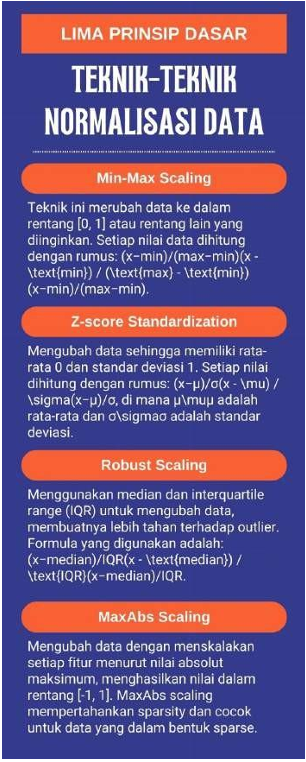

# 5.9 Pengantar Analisis Sentimen

Dalam video ini, kita akan memberikan pengantar tentang analisis sentimen,
yang merupakan salah satu aplikasi penting dalam Natural Language Processing
(NLP). Analisis sentimen bertujuan untuk menentukan apakah suatu teks
mengungkapkan perasaan positif, negatif, atau netral. Kita akan membahas berbagai
teknik yang digunakan dalam analisis sentimen, mulai dari metode sederhana seperti
penghitungan kata hingga algoritma machine learning yang lebih kompleks. Selain itu,
kita juga akan mengeksplorasi bagaimana analisis sentimen dapat diterapkan di
berbagai bidang, termasuk pemasaran, layanan pelanggan, dan penelitian sosial.
Dengan  pemahaman  dasar  ini,  Anda  akan  dipersiapkan  untuk  menjelajahi  lebih.